In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\ROHINI\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\ROHINI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
delivery_df = pd.read_csv("delivery.csv")
delivery_df.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [4]:
print("Size of the data : ", delivery_df.shape)

Size of the data :  (25, 3)


#### Visualizing the entire dataframe

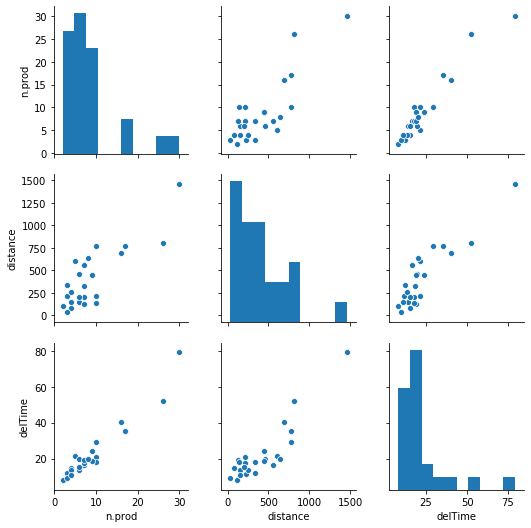

In [5]:
sns.pairplot(delivery_df)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
multiple_reg = LinearRegression()
X = delivery_df[["n.prod","distance"]]
y = delivery_df["delTime"]
multiple_reg.fit(X,y)

LinearRegression()

In [8]:
print("Intercept :", multiple_reg.intercept_,"\nCoefficients :",multiple_reg.coef_)

Intercept : 2.3412311451922 
Coefficients : [1.61590721 0.01438483]


In [9]:
predictions = multiple_reg.predict(X)
predictions

array([21.70808432, 10.35361455, 12.0797937 ,  9.95564609, 14.19439835,
       18.39957428,  7.15537645, 16.67339513, 71.8202938 , 19.12358708,
       38.09250698, 21.5930409 , 12.47299068, 18.68246414, 23.3287982 ,
       29.66292843, 14.91363966, 15.55137869,  7.70680652, 40.88796994,
       20.51417893, 56.00652789, 23.35756786, 24.4028535 , 10.96258393])

#### Visualizing Multiple Linear Regression Model

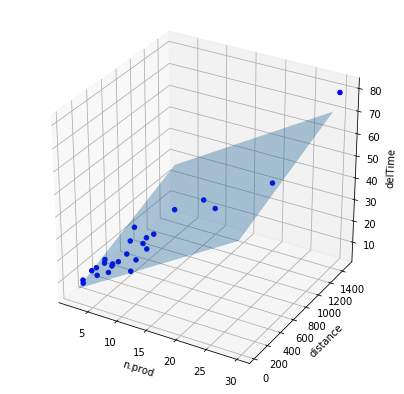

In [10]:
from mpl_toolkits.mplot3d import Axes3D
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery_df["n.prod"], ys = delivery_df["distance"], zs=delivery_df["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery_df["n.prod"].min(), delivery_df["n.prod"].max(), 1) 
y_surf = np.arange(delivery_df["distance"].min(), delivery_df["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = multiple_reg.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)
plt.show()

#### RMSE

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
print("RMSE :", np.sqrt(mean_squared_error(y, predictions)))

RMSE : 3.0576571254511373
